<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_06_ClasificacionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificacion Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos basado en dos características:



In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
import numpy as np

Text(0, 0.5, 'X_2')

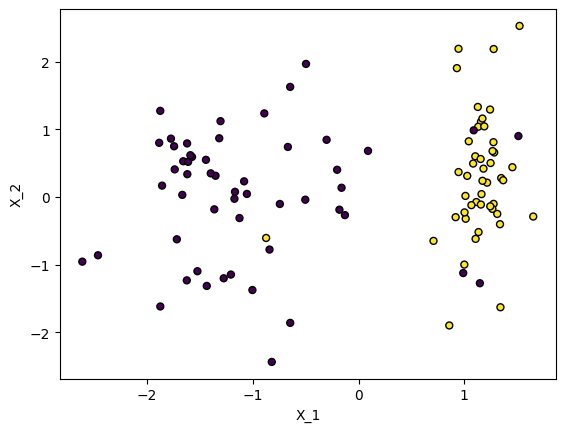

In [106]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de lods  sistemas basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



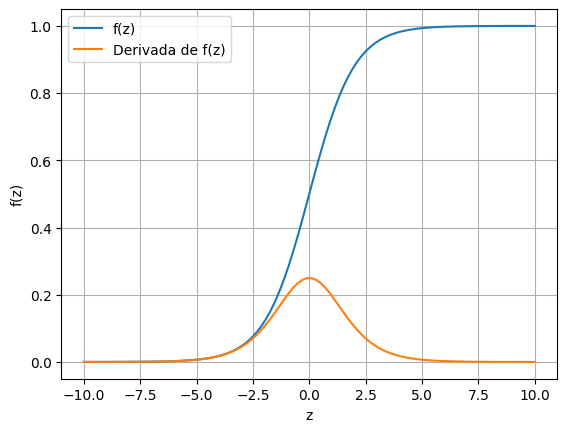

In [107]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, así:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desicion entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos que los parametros $\Theta$ entonces podemos definir la frontera de clasifiación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Ecnontrar la ecuacion de la recta y mejorar la parametrizacion

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [108]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

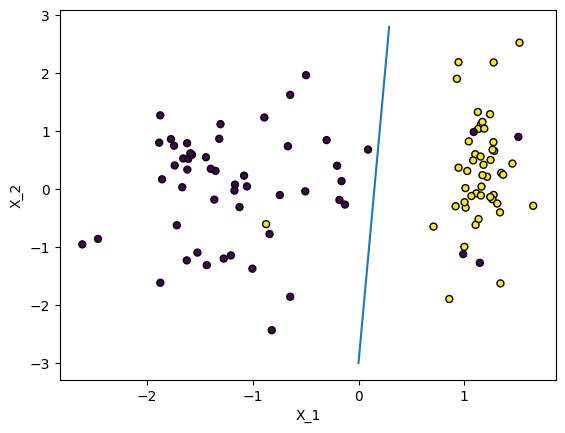

In [109]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Fronteras no lineal también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como funcion de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenmos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(np.float64(-1.12244940477901),
 np.float64(1.1839643638442499),
 np.float64(-1.2696420440360447),
 np.float64(1.185918477713659))

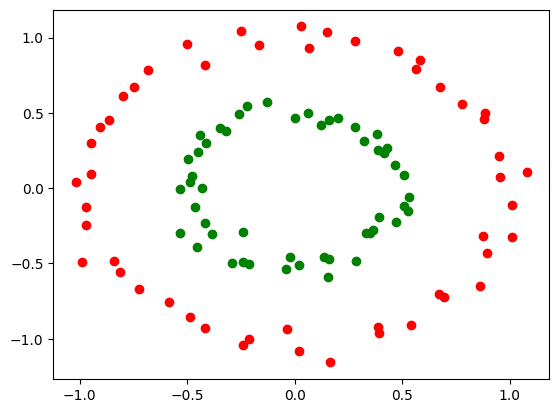

In [110]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

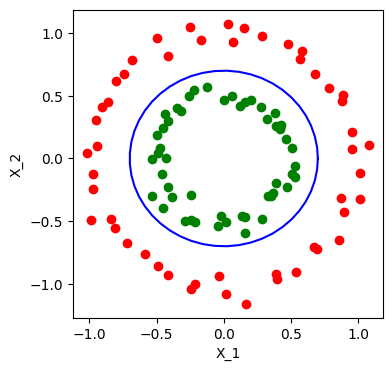

In [111]:
#Por motivos graficos transformemos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T (X)}}
\end{equation}



Para ello, podemos definir la función de coste como :


\begin{equation}
J = \left \{
  \begin{array}{ c l }
    -\log h(x) & \quad \textrm{if } y = 1 \\
    -\log (1-h(x))  & \quad \textrm{if } y = 0 \\
  \end{array}
\right.
\end{equation}



Resumida en la siguiente expresión:


$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadose para la regresión logistica de acuerdo a la teoría de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, se cumple que cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimizacion  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoria de la probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimizacion permite encontrar los valores de $\theta$ despues de un conjunto determinado de itereaciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minizacion podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


## Interpretación probabilística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresion logistica?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los mas probables es decir que para encontrar los valores de $\theta$ que nos garantizan la maxima probabilidad es necesario maximar la función anterior. Despues de realizar los calculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





## Regularización


### Regresion Lineal
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


- El gradiente descendente puede ser escrito como:
\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



### Normal equation

\begin{equation}
\theta=(X^TX\lambda L)^{-1} X^T y
\end{equation}

\begin{equation}
\lambda=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}

Las dimensiones de $[\lambda]=(\mathrm{n+1}) \times (\mathrm{n+1})$



## 

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:


In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

iris_raw = datasets.load_iris()
iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)
iris['target'] = datasets.load_iris().target

iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
125,7.2,3.2,6.0,1.8,2
27,5.2,3.5,1.5,0.2,0
97,6.2,2.9,4.3,1.3,1
143,6.8,3.2,5.9,2.3,2
45,4.8,3.0,1.4,0.3,0


In [113]:
iris.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64


1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1


In [114]:
map_class_A = lambda x: 0 if x== 0 else 1
iris['target_A'] = iris['target'].map(map_class_A)

2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$


In [115]:
(iris.shape[0] - iris['target_A'].sum()) / iris.shape[0]

np.float64(0.3333333333333333)

3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1


In [116]:
map_class_B = lambda x: 0 if x== 1 else 1
iris['target_B'] = iris['target'].map(map_class_B)


4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$


In [117]:
(iris.shape[0] - iris['target_B'].sum()) / iris.shape[0]

np.float64(0.3333333333333333)

5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1



In [118]:
# Fue básicamente un OneHotEncoding 
map_class_C = lambda x: 0 if x== 2 else 1
iris['target_C'] = iris['target'].map(map_class_C)

6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$

In [119]:
(iris.shape[0] - iris['target_C'].sum()) / iris.shape[0]

np.float64(0.3333333333333333)



Estrategia de solución.

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```


In [120]:
# metodo DESCR no es propio de df, es del objeto original 
print(iris_raw.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.



In [121]:
# Ya había construido el df más arriba 


3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```



In [122]:
import re
# No me gusta tanto CamelCase, prefiero snake_case
columns_name =[ "_".join(
                    [c for c in re.sub(r'\s*\(cm\)', '', cols).split()]) # Elimina el (cm)
                        for cols in iris.columns ] # Itera sobre cols

iris.columns = columns_name


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.



In [123]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target,target_A,target_B,target_C
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.666667,0.666667,0.666667
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,1.000000,1.000000,1.000000


In [124]:
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
target_A        0
target_B        0
target_C        0
dtype: int64

5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion



<Axes: xlabel='sepal_length', ylabel='Count'>

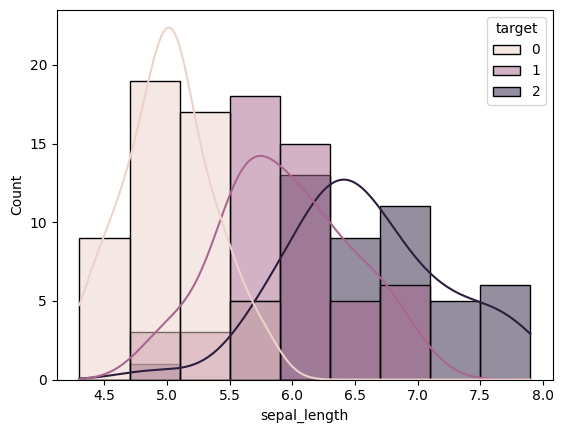

In [125]:
sns.histplot(data=iris, x='sepal_length', hue='target', kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

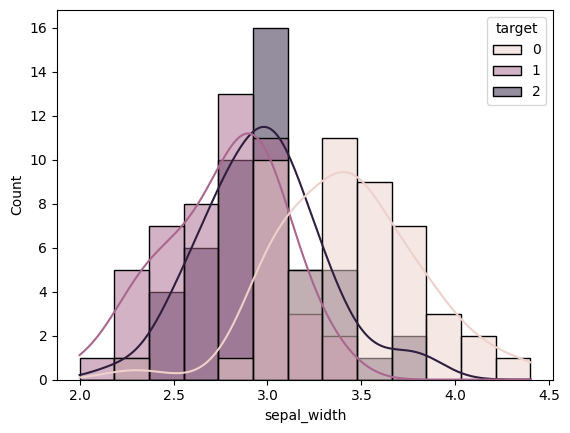

In [126]:
sns.histplot(data=iris, x='sepal_width', hue='target', kde=True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

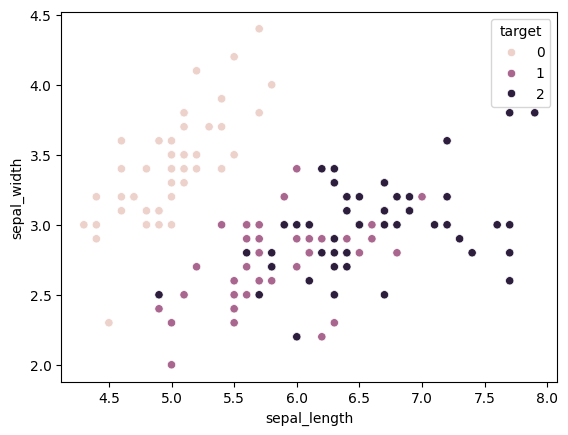

In [127]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='target')

<Axes: xlabel='petal_length', ylabel='petal_width'>

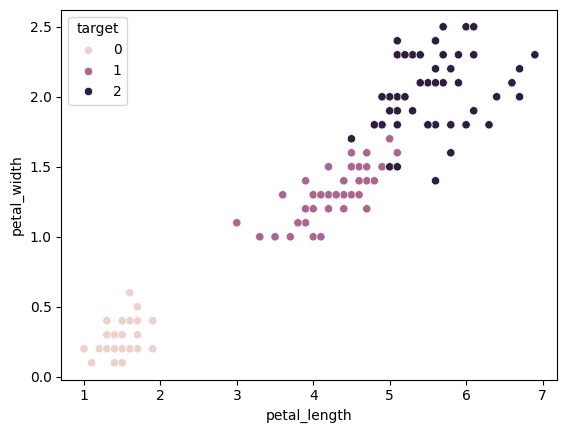

In [128]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='target')


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.



<Axes: >

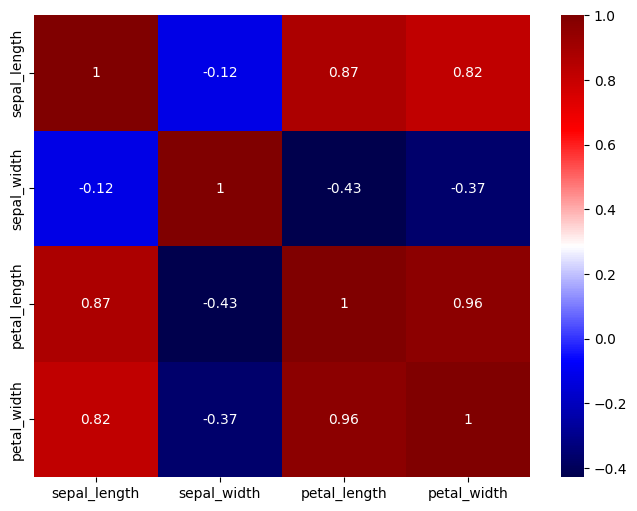

In [129]:
corr = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='seismic')


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


In [130]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
target = 'target_A' # Para el punto de más adelante que pide Setosa o no Setosa

for train_index, test_index in split.split(iris, iris[target]):
  train_set = iris.loc[train_index]
  test_set = iris.loc[test_index]

In [131]:
train_set[target].value_counts() / len(train_set)

target_A
1    0.666667
0    0.333333
Name: count, dtype: float64



8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


In [132]:
from sklearn.linear_model import LogisticRegression

# cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cols = ['petal_length']
X_train = train_set[cols].values
Y_train = train_set[target].values
X_test = test_set[cols].values
Y_test = test_set[target].values

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()



9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```



In [133]:
model.score(X_test, Y_test)

1.0

In [134]:
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
prob = model.predict_proba(X_new)

decision_boundary = X_new[prob[:, 1] >= 0.5][0]




10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad



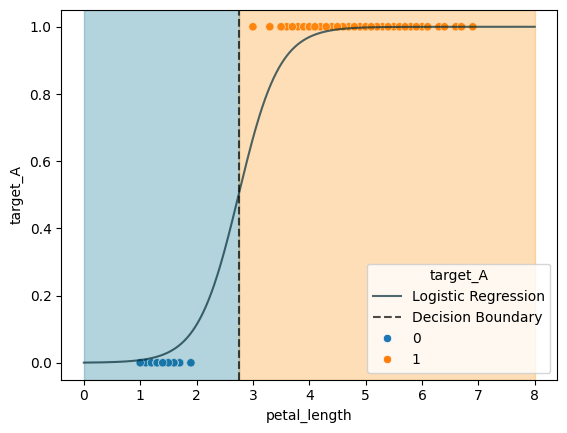

In [140]:
plt.plot(X_new, prob[:, 1], label='Logistic Regression', color="#012c38", alpha=0.7)
plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary', alpha=0.7)
sns.scatterplot(data=iris, x='petal_length', y='target_A', hue='target_A')

plt.axvspan(0, decision_boundary[0], color="#07718f", alpha=0.3)
plt.axvspan(decision_boundary[0], 8, color="#fa940f", alpha=0.3)

# plt.fill_between(X_new.flatten(), 0, prob[:, 1], color="#012c38", alpha=0.3)


11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.



In [143]:
cols = ['petal_length', 'petal_width']
target = 'target'
# cols = ['sepal_length']

X_train = train_set[cols].values
y_train = train_set[target].values
X_test = test_set[cols].values
y_test = test_set[target].values

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()


12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

In [ ]:
# Para este dataset no fue necesario escalar los datos en el caso dos dimensional, hay muy buena precisión 
model.score(X_test, y_test)

0.9666666666666667

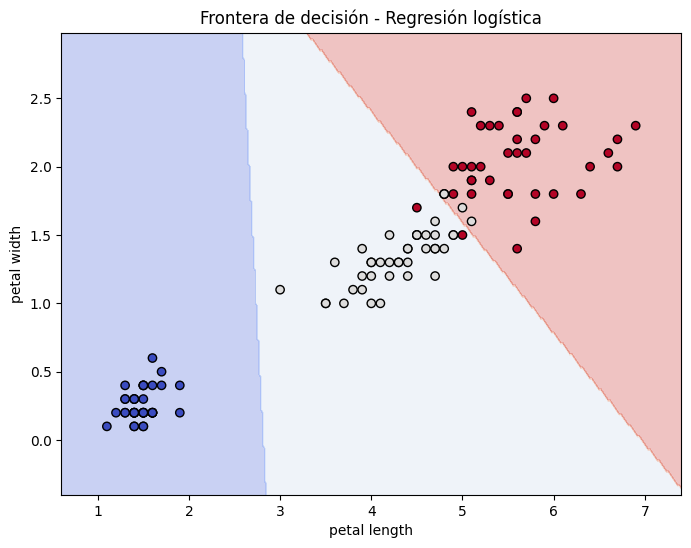

In [146]:

# Límites del gráfico
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

# Crear una malla de puntos (resolución 0.02)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicciones del modelo sobre toda la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Fondo coloreado según la predicción
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Puntos de entrenamiento reales
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Frontera de decisión - Regresión logística')
plt.show()

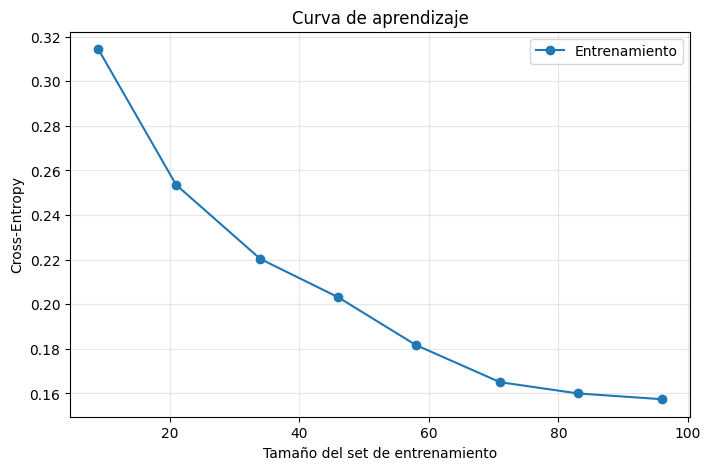

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_log_loss',   # cross entropy
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_loss = -train_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_loss, 'o-', label='Entrenamiento')
plt.xlabel('Tamaño del set de entrenamiento')
plt.ylabel('Cross-Entropy')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# [SOFTMAX REGRESION](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax)


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

[Referencias]  [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


# Reto, no es obligatorio.

### Clasificación de pulsar.

Para el siguiente  dataset descrito en el este enlace [pulsar](https://archive.ics.uci.edu/ml/datasets/HTRU2)  , construir un clasificador logístico, para ello, deberá primera entender las caracteristicas del problema y seguidamente estudiar el comportamiento de la clasificacion realizada.


1. Dividir los datos en train and test
2. Entrenar el algoritmo.
3. Analizar las curvas de aprendizaje.
4. Realizar Predicciones
5. Aplicar regularización.


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html